## Carga de datos

In [28]:
import os
from PIL import Image
import numpy as np

# Directorio donde están las imágenes
base_dir = './data/images/train'

# Diccionario de etiquetas
dicc_sent = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'neutral': 4,
    'sad': 5,
    'surprise': 6
}

# Listas para almacenar imágenes y etiquetas
X = []
y = []

# Iterar sobre las carpetas en el directorio base
for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)
    label = dicc_sent[folder_name]
    
    # Iterar sobre cada archivo de imagen en la carpeta
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        
        # Cargar la imagen en escala de grises usando PIL
        img = Image.open(img_path).convert('L')
        
        # Convertir la imagen a un array de NumPy
        img_array = np.array(img)
        
        # Agregar la imagen y su etiqueta a las listas
        X.append(img_array)
        y.append(label)

# Convertir listas a arrays de NumPy
X = np.array(X)
y = np.array(y)

# Verificar las dimensiones de los arrays
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)


# Normalizar las imágenes
X = X / 255.0

Dimensiones de X: (28821, 48, 48)
Dimensiones de y: (28821,)


## División Train, Test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Verificar las dimensiones de los datos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (20174, 48, 48)
Dimensiones de X_test: (8647, 48, 48)
Dimensiones de y_train: (20174,)
Dimensiones de y_test: (8647,)


## Modelos

### Modelo 'a mano' num_1

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definir el modelo
model = Sequential()

# Capas convolucionales y de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Capas completamente conectadas
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 clases para las emociones

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

c:\Users\Alfonso\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,274,887 (4.86 MB)

 Trainable params: 1,274,887 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train,
                    validation_data=(X_test.reshape(-1, 48, 48, 1), y_test),
                    epochs=20, 
                    batch_size=32, 
                    verbose=1,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test, verbose=1)
print("\nAccuracy en los datos de prueba:", test_acc)

Epoch 1/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 87s 120ms/step - accuracy: 0.2485 - loss: 1.8203 - val_accuracy: 0.3635 - val_loss: 1.6418
Epoch 2/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 63s 99ms/step - accuracy: 0.3787 - loss: 1.5947 - val_accuracy: 0.4396 - val_loss: 1.4587
Epoch 3/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 63s 99ms/step - accuracy: 0.4412 - loss: 1.4574 - val_accuracy: 0.4802 - val_loss: 1.3733
Epoch 4/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 62s 98ms/step - accuracy: 0.4815 - loss: 1.3648 - val_accuracy: 0.5008 - val_loss: 1.2886
Epoch 5/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.5108 - loss: 1.2909 - val_accuracy: 0.5145 - val_loss: 1.2572
Epoch 6/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 64s 101ms/step - accuracy: 0.5279 - loss: 1.2308 - val_accuracy: 0.5279 - val_loss: 1.2306
Epoch 7/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 62s 97ms/step - accuracy: 0.5525 - loss: 1.1771 - val_accuracy: 0.5372 - val_loss: 1.2066
Epoch 8/20
631/631 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.5704 - loss: 1.1226

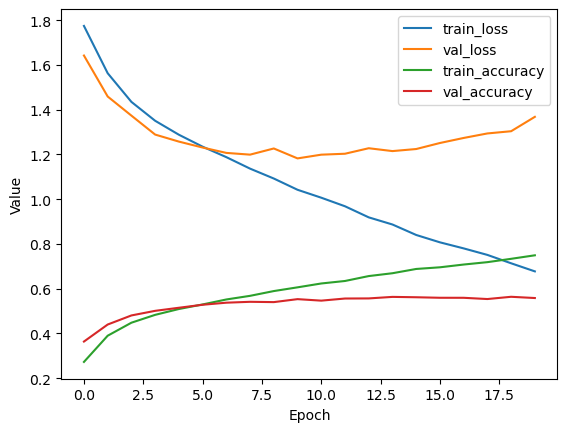

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

271/271 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step
Confusion Matrix:
 [[ 599   11  113   83  192  176   24]
 [  35   53   10    4   12   14    3]
 [ 144    2  455   74  180  245  131]
 [  47    0   33 1815  138   79   37]
 [ 108    1   91  117  937  222   19]
 [ 161    3  173   72  333  729   10]
 [  12    1  138   56   49   18  688]]


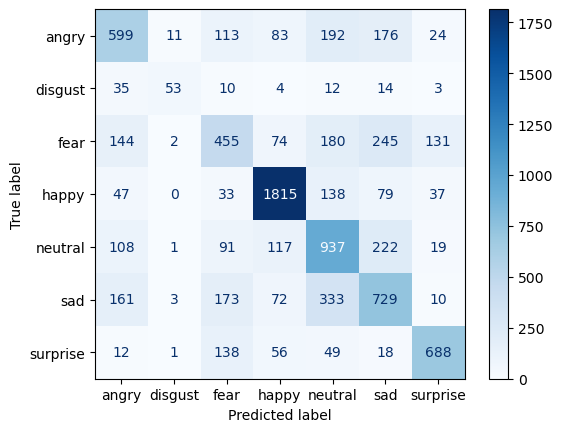

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52      1198
           1       0.75      0.40      0.52       131
           2       0.45      0.37      0.41      1231
           3       0.82      0.84      0.83      2149
           4       0.51      0.63      0.56      1495
           5       0.49      0.49      0.49      1481
           6       0.75      0.72      0.73       962

    accuracy                           0.61      8647
   macro avg       0.62      0.56      0.58      8647
weighted avg       0.61      0.61      0.61      8647



In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Predicciones en el conjunto de validación
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(dicc_sent.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

### Modelo 'a mano' num_2

Aumentando la complejidad del modelo

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

model = Sequential()

# Definir la entrada del modelo
model.add(Input(shape=(48, 48, 1)))

# Aumentar la complejidad del modelo
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,703,047 (6.50 MB)

 Trainable params: 1,702,087 (6.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [17]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history_model_2 = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=64,
                    callbacks=[reduce_lr, early_stopping, model_checkpoint])

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 111s 330ms/step - accuracy: 0.2173 - loss: 2.2977 - val_accuracy: 0.2493 - val_loss: 1.8345 - learning_rate: 0.0010
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 101s 319ms/step - accuracy: 0.2807 - loss: 1.7641 - val_accuracy: 0.3786 - val_loss: 1.6551 - learning_rate: 0.0010
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 89s 281ms/step - accuracy: 0.3476 - loss: 1.6321 - val_accuracy: 0.4043 - val_loss: 1.5290 - learning_rate: 0.0010
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 94s 297ms/step - accuracy: 0.3775 - loss: 1.5701 - val_accuracy: 0.4016 - val_loss: 1.5191 - learning_rate: 0.0010
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 104s 328ms/step - accuracy: 0.4146 - loss: 1.5070 - val_accuracy: 0.3895 - val_loss: 1.5643 - learning_rate: 0.0010
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 96s 304ms/step - accuracy: 0.4246 - loss: 1.4595 - val_accuracy: 0.3764 - val_loss: 1.6310 - learning_rate: 0.0010
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 95s 301ms/step - accuracy: 

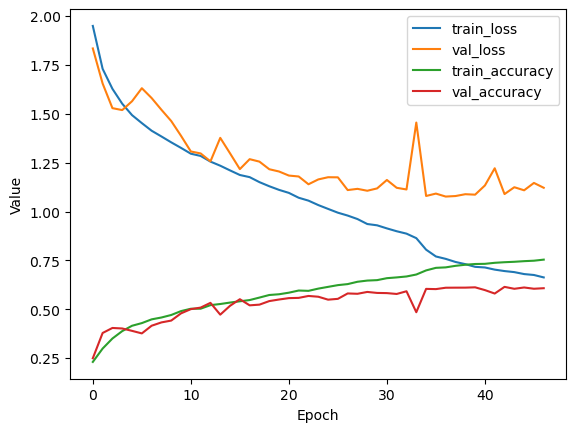

In [22]:
import matplotlib.pyplot as plt
plt.plot(history_model_2.history['loss'], label='train_loss')
plt.plot(history_model_2.history['val_loss'], label='val_loss')
plt.plot(history_model_2.history['accuracy'], label='train_accuracy')
plt.plot(history_model_2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

271/271 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step
Confusion Matrix:
 [[ 599   11  113   83  192  176   24]
 [  35   53   10    4   12   14    3]
 [ 144    2  455   74  180  245  131]
 [  47    0   33 1815  138   79   37]
 [ 108    1   91  117  937  222   19]
 [ 161    3  173   72  333  729   10]
 [  12    1  138   56   49   18  688]]


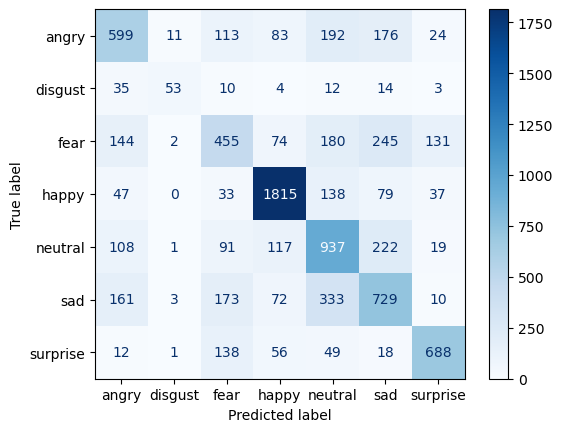

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52      1198
           1       0.75      0.40      0.52       131
           2       0.45      0.37      0.41      1231
           3       0.82      0.84      0.83      2149
           4       0.51      0.63      0.56      1495
           5       0.49      0.49      0.49      1481
           6       0.75      0.72      0.73       962

    accuracy                           0.61      8647
   macro avg       0.62      0.56      0.58      8647
weighted avg       0.61      0.61      0.61      8647



In [23]:
# Predicciones en el conjunto de validación
y_pred_model_2 = model.predict(X_test)
y_pred_classes_model_2 = np.argmax(y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes_model_2)
print("Confusion Matrix:\n", cm)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(dicc_sent.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_classes_model_2))

### Modelos 'a mano' mejorado con ImageDataGenerator

Veamos si podemos mejorar el modelo

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau


# Normalización y aumento de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Solo normalización para el conjunto de validación
val_datagen = ImageDataGenerator()

# Definir los generadores de datos
train_generator = train_datagen.flow(X_train.reshape(-1, 48, 48, 1), y_train, batch_size=64)
val_generator = val_datagen.flow(X_test.reshape(-1, 48, 48, 1), y_test, batch_size=64)

# Definir los callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Cambio en el nombre del archivo

# Entrenar el modelo utilizando los generadores
history_model_2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[reduce_lr, early_stopping, model_checkpoint]
)

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(val_generator, verbose=1)
print("\nAccuracy en los datos de prueba:", test_acc)

Epoch 1/50


c:\Users\Alfonso\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


316/316 ━━━━━━━━━━━━━━━━━━━━ 98s 308ms/step - accuracy: 0.4865 - loss: 1.3687 - val_accuracy: 0.5538 - val_loss: 1.1917 - learning_rate: 0.0010
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 97s 306ms/step - accuracy: 0.5072 - loss: 1.2971 - val_accuracy: 0.5519 - val_loss: 1.2092 - learning_rate: 0.0010
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 98s 309ms/step - accuracy: 0.5302 - loss: 1.2537 - val_accuracy: 0.5249 - val_loss: 1.2431 - learning_rate: 0.0010
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 97s 305ms/step - accuracy: 0.5262 - loss: 1.2502 - val_accuracy: 0.5755 - val_loss: 1.1600 - learning_rate: 0.0010
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 99s 313ms/step - accuracy: 0.5316 - loss: 1.2428 - val_accuracy: 0.5782 - val_loss: 1.1361 - learning_rate: 0.0010
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 97s 306ms/step - accuracy: 0.5288 - loss: 1.2380 - val_accuracy: 0.5726 - val_loss: 1.1284 - learning_rate: 0.0010
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 97s 305ms/step - accuracy: 0.5349 - loss:

271/271 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step
Confusion Matrix:
 [[ 599   11  113   83  192  176   24]
 [  35   53   10    4   12   14    3]
 [ 144    2  455   74  180  245  131]
 [  47    0   33 1815  138   79   37]
 [ 108    1   91  117  937  222   19]
 [ 161    3  173   72  333  729   10]
 [  12    1  138   56   49   18  688]]


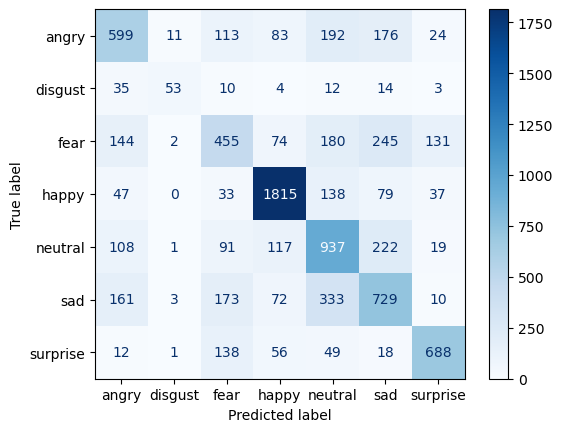

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52      1198
           1       0.75      0.40      0.52       131
           2       0.45      0.37      0.41      1231
           3       0.82      0.84      0.83      2149
           4       0.51      0.63      0.56      1495
           5       0.49      0.49      0.49      1481
           6       0.75      0.72      0.73       962

    accuracy                           0.61      8647
   macro avg       0.62      0.56      0.58      8647
weighted avg       0.61      0.61      0.61      8647



In [37]:
# Predicciones en el conjunto de validación
y_pred_model_2 = model.predict(X_test)
y_pred_classes_model_2 = np.argmax(y_pred, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes_model_2)
print("Confusion Matrix:\n", cm)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(dicc_sent.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Reporte de clasificación
print("Classification Report:\n", classification_report(y_test, y_pred_classes_model_2))

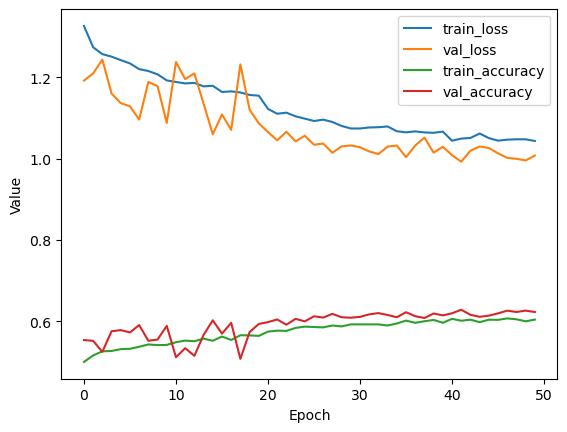

In [38]:
import matplotlib.pyplot as plt
plt.plot(history_model_2.history['loss'], label='train_loss')
plt.plot(history_model_2.history['val_loss'], label='val_loss')
plt.plot(history_model_2.history['accuracy'], label='train_accuracy')
plt.plot(history_model_2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [40]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,107,223 (19.48 MB)

 Trainable params: 1,702,087 (6.49 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 3,404,176 (12.99 MB)

In [43]:
import pandas as pd

# Obtener la configuración del modelo como un diccionario
config = model.get_config()

# Mostrar la configuración del modelo
print("Configuración del modelo:")
for key, value in config.items():
    print(f"\n{key}:")
    print(value)

# Opcionalmente, si deseas imprimirlo como un DataFrame de Pandas
config_df = pd.DataFrame.from_dict(config, orient='index')
print("\nConfiguración del modelo como DataFrame:")
print(config_df)

Configuración del modelo:

name:
sequential_3

trainable:
True

dtype:
float32

layers:
[{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 48, 48, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_3'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_10', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None

In [48]:
from tensorflow.keras.models import load_model

# Definir la ruta completa donde se guardará el modelo en formato .keras
model_path = './models/modelo_entrenado.keras'

# Guardar el modelo después de entrenar
model.save(model_path)

print(f"Modelo guardado en {model_path}")

Modelo guardado en ./models/modelo_entrenado.keras


___

## Modelo de keras

### MobileNetV2 transfer-learning

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model


# Replicar el canal para convertir a 3 canales
X_train_rgb = np.repeat(X_train[..., np.newaxis], 3, -1)
X_test_rgb = np.repeat(X_test[..., np.newaxis], 3, -1)

# Cargar el modelo MobileNetV2 preentrenado en ImageNet, sin incluir la capa de clasificación superior
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Agregar nuevas capas de clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Definir el modelo completo
model_mobile_v2 = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas base (las capas preentrenadas no se entrenarán)
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model_mobile_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model_mobile_v2.summary()

# Asegurar que las etiquetas de destino tengan una dimensión adecuada
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)
if len(y_test.shape) > 1:
    y_test = np.argmax(y_test, axis=1)

# Entrenamiento del modelo
history_mobile_v2 = model_mobile_v2.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test), epochs=10, batch_size=64)

C:\Users\Alfonso\AppData\Local\Temp\ipykernel_13280\633626280.py:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 24, 24,    │        864 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 24, 24,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 24, 24,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 24, 24,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 24, 24,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 24, 24,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 24, 24,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 24, 24,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 24, 24,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 25, 25,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 12, 12,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 12, 12,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 12, 12,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 12, 12,    │      2,304 │ block_1_depthwis

 Total params: 2,587,719 (9.87 MB)

 Trainable params: 329,735 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 60s 140ms/step - accuracy: 0.3168 - loss: 1.7735 - val_accuracy: 0.3754 - val_loss: 1.5939
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.4325 - loss: 1.4692 - val_accuracy: 0.3874 - val_loss: 1.5733
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 43s 137ms/step - accuracy: 0.4957 - loss: 1.3336 - val_accuracy: 0.3866 - val_loss: 1.5994
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 42s 131ms/step - accuracy: 0.5693 - loss: 1.1667 - val_accuracy: 0.3972 - val_loss: 1.6267
Epoch 5/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.6350 - loss: 1.0188 - val_accuracy: 0.3998 - val_loss: 1.6819
Epoch 6/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 44s 138ms/step - accuracy: 0.7094 - loss: 0.8467 - val_accuracy: 0.3982 - val_loss: 1.7846
Epoch 7/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 40s 125ms/step - accuracy: 0.7743 - loss: 0.6803 - val_accuracy: 0.4028 - val_loss: 1.9041
Epoch 8/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.8284 - loss: 0